<a href="https://colab.research.google.com/github/farzanajui/Farzana_Akter_23337406/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 0749442c62d8427dacd7bf2fc3245ed7.L34nnJS2MhpTBymjN6ubsKE9


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [4]:
import requests

def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location using wttr.in.

    Args:
        location (str): City or location name (e.g. "London", "Paris", "Perth")
        forecast_days (int): Number of days to forecast (1–5)

    Returns:
        dict: Weather data including current conditions and forecast, or None if error.
    """

    def _validate_days(days):
        """Ensure forecast_days stays within 1–5 range."""
        return max(1, min(days, 5))

    def _fetch_data(url):
        """Fetch and return JSON data from wttr.in, handling errors."""
        try:
            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            return resp.json()
        except requests.RequestException as err:
            print(f"Error fetching weather data: {err}")
            return None

    def _extract_current(current_data):
        """Extract and simplify current condition info."""
        if not current_data:
            return {}
        data = current_data[0]
        return {
            "temp_C": data.get("temp_C"),
            "weatherDesc": data.get("weatherDesc", [{}])[0].get("value"),
            "humidity": data.get("humidity"),
            "FeelsLikeC": data.get("FeelsLikeC"),
            "windspeedKmph": data.get("windspeedKmph"),
            "precipMM": data.get("precipMM"),
        }

    def _extract_forecast(weather_data, days):
        """Extract and format forecast for specified number of days."""
        forecast_list = []
        for entry in weather_data[:days]:
            astronomy = entry.get("astronomy", [{}])[0]
            forecast_list.append({
                "date": entry.get("date"),
                "maxtempC": entry.get("maxtempC"),
                "mintempC": entry.get("mintempC"),
                "avgtempC": entry.get("avgtempC"),
                "sunrise": astronomy.get("sunrise"),
                "sunset": astronomy.get("sunset"),
                "hourly": entry.get("hourly", [])
            })
        return forecast_list

    # --- Main execution ---
    forecast_days = _validate_days(forecast_days)
    api_url = f"https://wttr.in/{location}?format=j1"

    raw_data = _fetch_data(api_url)
    if not raw_data:
        return None

    current = _extract_current(raw_data.get("current_condition", []))
    forecast = _extract_forecast(raw_data.get("weather", []), forecast_days)

    return {
        "location": location,
        "current": current,
        "forecast": forecast
    }

## 📊 Visualisation Functions

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def create_temperature_visualisation(weather_data, date_range=None, output_type='display'):
    """
    Create a bar chart visualisation of temperature data across a date range.

    Args:
        weather_data (dict): The processed weather data from get_weather_data()
        date_range (tuple/list): Optional start and end date ("YYYY-MM-DD", "YYYY-MM-DD")
        output_type (str): 'display' to show in notebook or 'figure' to return the matplotlib figure

    Returns:
        matplotlib.figure.Figure if output_type == 'figure', else None
    """
    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]
    df = pd.DataFrame(forecast)

    # Ensure numeric temperature values
    for col in ["maxtempC", "mintempC", "avgtempC"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Convert and filter by date range if provided
    df["date"] = pd.to_datetime(df["date"])
    if date_range:
        start_date, end_date = pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])
        df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    if df.empty:
        print("No data found for the given date range.")
        return None

    # Create bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.25
    x = range(len(df))

    ax.bar([i - bar_width for i in x], df["maxtempC"], width=bar_width, label="Max Temp (°C)", color="red")
    ax.bar(x, df["avgtempC"], width=bar_width, label="Avg Temp (°C)", color="green")
    ax.bar([i + bar_width for i in x], df["mintempC"], width=bar_width, label="Min Temp (°C)", color="blue")

    ax.set_title(f"Temperature Forecast for {weather_data['location']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.set_xticks(x)
    ax.set_xticklabels(df["date"].dt.strftime("%Y-%m-%d"), rotation=45)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()

    # Return or display
    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

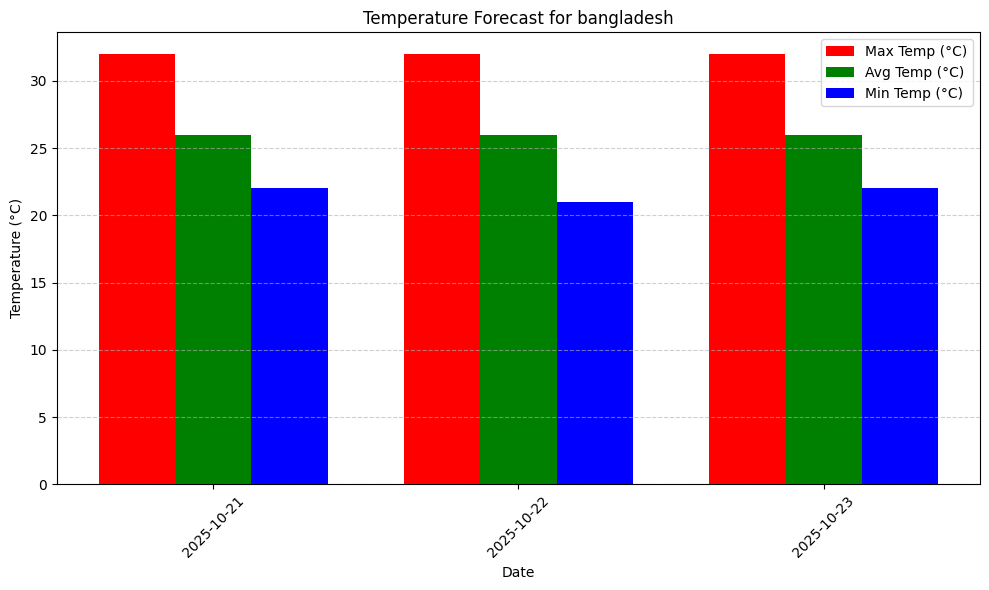

None


In [7]:
weather_data = get_weather_data('bangladesh', 3)
print(create_temperature_visualisation(weather_data))

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.